# Elementos sintácticos
Vamos a revisar algunos elementos sintácticos para el procesamiento de lenguaje natural, con foco en parte del discurso (POS) y *dependency parsing*

In [1]:
import os, re, string
import nltk
import spacy
import pandas as pd
import numpy, matplotlib
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Importación del documento 

Importamos y preparamos de forma básica el documento

In [2]:

abre=open("nuevo_testamento_valera.txt",encoding="UTF-8")
base=abre.read()
##inicio y final
inicio="HEBREO Y GRIEGO"
init=base.find(inicio)
finale=base.find("The first pass")
base2=base[init+len(inicio):finale]
##limpieza
base2a = re.sub ("\n|\t"," ",base2)
##paso a minusculas
base3=base2a.lower()
base3[0:1000]



'    capítulo  1          1 en el principio era el verbo, y el verbo era con dios, y el verbo era dios.          2 este era en el principio con dios.          3 todas las cosas por él fueron hechas; y sin él nada de lo que es hecho, fué hecho.          4 en él estaba la vida, y la vida era la luz de los hombres.          5 y la luz en las tinieblas resplandece; mas las tinieblas no la comprendieron.          6 fué un hombre enviado de dios, el cual se llamaba juan.          7 este vino por testimonio, para que diese testimonio de la luz, para que todos creyesen por él.          8 no era él la luz, sino para que diese testimonio de la luz.          9 [aquél] era la luz verdadera, que alumbra á todo hombre que viene á este mundo.          10 en el mundo estaba, y el mundo fué hecho por él; y el mundo no le conoció.          11 a lo suyo vino, y los suyos no le recibieron.          12 mas á todos los que le recibieron, dióles potestad de ser hechos hijos de dios, á los que creen en su nom

##Preparación lexicomorfológica
Vamos a separar nuestras unidades del vocabulario

In [3]:
nltk.download("punkt")
fichas2=nltk.tokenize.word_tokenize(base3,language="spanish")
libro1=nltk.Text(fichas2)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preparamos nuestros stopwords

In [4]:
nltk.download("stopwords")
from nltk.corpus import stopwords
misstop=stopwords.words("spanish")+["á","Y"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Filtramos los stopwords, es decir, los retiramos de nuestro texto.

In [5]:
filtra=[word for word in fichas2 if word not in misstop]
len(filtra)
total=" ".join(filtra)


 Cargamos spacy...

In [6]:
spacy.cli.download("es")
nlp=spacy.load("es_core_news_sm")

⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


Luego ajustamos las stopwords y creamos el libro de spacy

In [7]:
for word in misstop:
    nlp.vocab[word].is_stop=True

doc1=nlp(base3)

## Partes del discurso (Part of speech)
Más allá de las palabras, el siguiente nivel de análisis implica la sintaxis o forma de combinar las palabras para producir oraciones con sentido. 
Una parte importante son las partes de la palabra (POS, por sus siglas en inglés), pues permiten refinar la búsqueda de temáticas que pueden ser interesantes para nosotros del texto.
El etiquetado de POS es usualmente un problema supervisado en bases de datos anotadas (treebanks). NLTK no ha desarrollado un POS tagger en español.

 En el siguiente ejemplo queremos centrarnos únicamente en los sustantivos. 
Como veremos, el resultado depende de la calidad del modelo de creación de POS, el cual es de mayor calidad en inglés que en español. Por ejemplo, el español no tiene la parte del discurso "fina" (tag_) que si tiene en inglés.

In [14]:
partes=[]
for x in range(1,len(doc1)):
    partes.append([doc1[x].text, doc1[x].lemma_,doc1[x].pos_, doc1[x].tag_, doc1[x].ent_type_,doc1[x].is_stop])
partes[100:150]


[['dios', 'dio', 'NOUN', 'NOUN', '', False],
 [',', ',', 'PUNCT', 'PUNCT', '', False],
 ['el', 'el', 'DET', 'DET', '', True],
 ['cual', 'cual', 'PRON', 'PRON', '', True],
 ['se', 'él', 'PRON', 'PRON', '', True],
 ['llamaba', 'llamar', 'VERB', 'VERB', '', False],
 ['juan', 'juan', 'PROPN', 'PROPN', '', False],
 ['.', '.', 'PUNCT', 'PUNCT', '', False],
 ['         ', '         ', 'SPACE', 'SPACE', '', False],
 ['7', '7', 'NUM', 'NUM', '', False],
 ['este', 'este', 'DET', 'DET', '', True],
 ['vino', 'vino', 'NOUN', 'NOUN', '', False],
 ['por', 'por', 'ADP', 'ADP', '', True],
 ['testimonio', 'testimonio', 'NOUN', 'NOUN', '', False],
 [',', ',', 'PUNCT', 'PUNCT', '', False],
 ['para', 'para', 'ADP', 'ADP', '', True],
 ['que', 'que', 'SCONJ', 'SCONJ', '', True],
 ['diese', 'dar', 'VERB', 'VERB', '', False],
 ['testimonio', 'testimonio', 'NOUN', 'NOUN', '', False],
 ['de', 'de', 'ADP', 'ADP', '', True],
 ['la', 'el', 'DET', 'DET', '', True],
 ['luz', 'luz', 'NOUN', 'NOUN', '', False],
 [',', 

Vamos inicialmente a extraer todos los nombres propios y a visualizarlos

In [24]:
nombres=[item[0] for item in partes if item[2]=="NOUN" and not item[5]]
print(set(nombres))


{'maneras', 'conciencia', 'ciego', 'barca', 'diferencia', 'tribulaciones', 'áspides', 'hermana', 'criador', 'patrobas', 'huésped', 'hombres', 'santas', 'tropiezo', 'número', 'tributo', 'ayudéis', 'saludaos', 'predicación', 'cántaro', 'bendiciones', 'solicitud', 'mujer', 'andrés', 'hora', 'miedo', 'tinajuelas', 'linternas', 'pedid', 'hieres', 'creyeres', 'amigo', 'jesús', 'serpiente', 'esposa', 'marido', 'betábara', 'secreto', 'judios', 'latín', 'boca', 'asalariado', 'intento', 'prójimo', 'ganado', 'dedo', 'soldados', 'vientres', 'calavera', 'regiones', 'mirra', 'naturaleza', 'gozo', 'víspera', 'pisadas', 'murmullo', 'soldado', 'hebreo', 'limosnas', 'griego', 'caída', 'blasfemia', 'gallo', 'juicio', 'ladrón', 'misericordias', 'sacar[la', 'mujeres', 'creeréis', 'manifiesto', 'obro', 'imagen', 'temas', 'cuerpo', 'flaco', 'apóstol', 'entendimiento', 'engaño', 'lengua', ']', 'viento', 'vista', 'ciencia', 'consiguiente', 'gemidos', 'novedad', 'culto', 'haremos', 'pámpanos', 'enemigo', 'honra

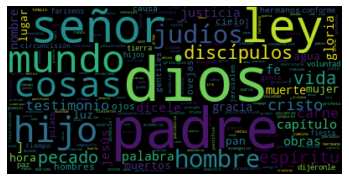

None

In [25]:
nombresspacy=pd.DataFrame(nombres)
contaname=pd.value_counts(nombresspacy[0]).to_frame()
contaname.columns=["conteo"]
contaname.index.name="nombre"
contaname["palabra"]=contaname.index

diccio={}
for freq,name in contaname.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure7=plt.show()
display(figure7)

Vamos a refinar aún más. Por ejemplo, me puede interesar específicamente cuales son los adjetivos (o descriptores) que se usan cuando se habla de Jesús. Nótese que esto, por ejemplo, podría servir para análisis de marca.
Primero obtengo las oraciones (es decir, utilizo un **token** diferente)

In [26]:
oraciones=[]
for oracion in doc1.sents:
    oraciones.append(oracion.text)
oraciones[0:2]


['    ',
 'capítulo  1          1 en el principio era el verbo, y el verbo era con dios, y el verbo era dios.']

Luego extraigo solamente las frases que contienen la palabra jesús

In [29]:
frasejesus = [s for s in oraciones if "jesús" in s]
frasejesus[5:10]


['y mirándole jesús, dijo: tú eres simón, hijo de jonás: tú serás llamado cephas (que quiere decir, piedra).',
 '43 el siguiente día quiso jesús ir á galilea, y halla á felipe, al cual dijo: sígueme.',
 '45 felipe halló á natanael, y dícele: hemos hallado á aquel de quien escribió moisés en la ley, y los profetas: á jesús, el hijo de josé, de nazaret.',
 '47 jesús vió venir á sí á natanael, y dijo de él: he aquí un verdadero israelita, en el cual no hay engaño.',
 '48 dícele natanael: ¿de dónde me conoces? respondió jesús, y díjole: antes que felipe te llamara, cuando estabas debajo de la higuera te vi.']

Extraigo información de spacy, incluyendo el POS

In [30]:
jesus=" ".join(frasejesus)
doc3=nlp(jesus)
partes=[]
for x in range(1,len(doc3)):
    partes.append([ doc3[x].text, doc3[x].lemma_,doc3[x].pos_, doc3[x].ent_type_,doc3[x].is_stop])


##tomo las palabras para extraerlas dependiendo del POS
mibase=pd.DataFrame(partes)
mibase.head(50)


,0,1,2,3,4
0,siguiente,siguiente,ADJ,,True
1,día,día,NOUN,,True
2,ve,ver,VERB,,False
3,juan,juan,PROPN,PER,False
4,á,á,CCONJ,,True
5,jesús,jesús,PROPN,LOC,False
6,que,que,PRON,,True
7,venía,venir,VERB,,False
8,á,á,DET,,True
9,él,él,PRON,,True


extraigo solo adjetivos

In [31]:
soloADJ=mibase[mibase[2]=="ADJ"]
soloADJ.head(20)


,0,1,2,3,4
0,siguiente,siguiente,ADJ,,True
72,díceles,dícel,ADJ,,False
101,llamado,llamado,ADJ,,False
113,siguiente,siguiente,ADJ,,True
252,tercer,tercer,ADJ,,False
254,hiciéronse,hiciéronse,ADJ,,False
274,llamado,llamado,ADJ,,False
391,díjoles,díjol,ADJ,,False
447,mismo,mismo,ADJ,,True
516,dios,dio,ADJ,,False


y finalmente contamos los tokens adjetivos alrededor de jesús

In [32]:
countsad=pd.value_counts(soloADJ[0]).to_frame().reset_index()
countsad.columns=["adjetivo","conteo"]
countsad.sort_values("conteo", ascending=False)
countsad.head(15)


,adjetivo,conteo
0,cierto,26
1,mismo,14
2,jesús,11
3,dios,8
4,respondióles,6
5,escrito,5
6,[,5
7,verdadero,5
8,díjoles,5
9,lázaro,5


Otra aplicación puede ser tener los "casos" de POS de un aspecto sintáctico que se busca (por ejemplo, colocaciones)

In [59]:
colocado=[]
for x in range(0,len(doc1)):
  if doc1[x].pos_=="NOUN" and doc1[x+1].pos_=="ADJ":
    colocado.append(doc1[x].text +" "+ doc1[x+1].text) 
colocado[0:20]

['hombre enviado',
 'luz verdadera',
 'fué dada',
 'fué hecha',
 'isaías profeta',
 'espíritu santo',
 'cosas mayores',
 'cielo abierto',
 'día hiciéronse',
 'agua hecha',
 'cambiadores sentados',
 'templo edificado',
 'dícele nicodemo',
 'cosas terrenas',
 'vida eterna',
 'hijo unigénito',
 'vida eterna',
 'cosas terrenas',
 'vida eterna',
 'mujer samaritana']

In [63]:
colocado2=[]
for x in range(0,len(doc1)):
  if doc1[x].pos_=="NOUN" and doc1[x+1].pos_=="ADP" and doc1[x+2].pos_=="NOUN":
    colocado2.append(doc1[x].text +" "+ doc1[x+1].text+ " "+doc1[x+2].text) 
colocado2[0:20]

['principio con dios',
 'vino por testimonio',
 'hijos de dios',
 'voluntad de carne',
 'unigénito del padre',
 'verdad por jesucristo',
 'seno del padre',
 'camino del señor',
 'medio de vosotros',
 'correa del zapato',
 'parte del jordán',
 'cordero de dios',
 'pecado del mundo',
 'hijo de dios',
 'cordero de dios',
 'hijo de jonás',
 'hijo de dios',
 'ángeles de dios',
 'hijo del hombre',
 'tinajuelas de piedra']

In [65]:
colocado3=[]
for x in range(0,len(doc1)):
  if doc1[x].pos_=="VERB" and doc1[x+1].pos_=="DET" and doc1[x+2].pos_=="NOUN":
    colocado3.append(doc1[x].text +" "+ doc1[x+1].text+ " "+doc1[x+2].text) 
colocado3[0:20]

['fué un hombre',
 'vimos su gloria',
 'enderezad el camino',
 'desatar la correa',
 'quita el pecado',
 'viene un varón',
 'descender el espíritu',
 'faltando el vino',
 'venido mi hora',
 'henchid estas tinajuelas',
 'gustó el agua',
 'sabían los sirvientes',
 'sacado el agua',
 'manifestó su gloria',
 'hecho un azote',
 'derramó los dineros',
 'trastornó las mesas',
 'vendían las palomas',
 'hagáis la casa',
 'acordaron sus discípulos']

In [67]:
colocado4=[]
for x in range(0,len(doc1)):
  if doc1[x].pos_=="VERB" and doc1[x+1].pos_=="ADP" and doc1[x+2].pos_=="NOUN":
    colocado4.append(doc1[x].text +" "+ doc1[x+1].text+ " "+doc1[x+2].text) 
colocado4[0:20]

['engendrados de sangre',
 'gracia por gracia',
 'enviaron de jerusalem',
 'bautizo con agua',
 'acontecieron en betábara',
 'bautizando con agua',
 'vi al espíritu',
 'descendía del cielo',
 'bautizar con agua',
 'bautiza con espíritu',
 'hallado al mesías',
 'llama al esposo',
 'hablaba del templo',
 'estando en jerusalem',
 'venido de dios',
 'nacido del espíritu',
 'subió al cielo',
 'descendió del cielo',
 'condene al mundo',
 'vino al mundo']

In [68]:
total_colocado=colocado+colocado2+colocado3+colocado4
coloc_potencial=pd.DataFrame(total_colocado)
countsad1=pd.value_counts(coloc_potencial[0]).to_frame().reset_index()
countsad1.columns=["colocacion","conteo"]
countsad1.sort_values("conteo", ascending=False)
countsad1.head(15)

,colocacion,conteo
0,vida eterna,21
1,hijo de dios,12
2,hijo del hombre,12
3,espíritu santo,9
4,hijos de dios,7
5,gloria de dios,6
6,día postrero,6
7,justicia de dios,6
8,voy al padre,6
9,abrió los ojos,4


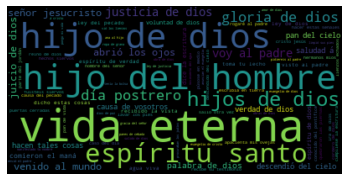

None

In [71]:
diccio_coloc={}
for name,freq in countsad1.values:
    diccio_coloc[name]=freq

nube.generate_from_frequencies(frequencies=diccio_coloc)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure8=plt.show()
display(figure8)

##Dependency parsing
Es posible con spacy ver la división de la oración *dependency parsing*, la cual presenta una estructura muy detallada (aunque no totalmente detallada) de cada oración, y trabajar exactamente con las características sintácticas que se deseen

In [36]:
from spacy import displacy

frasesin=nlp("Yo quisiera saber porqué ese buen jugador hizo tan mala jugada")

frasesin2=nlp("Con este sol lo único que quiero es playa, un ceviche y una helada")


dep=[]
for x in range(0,len(frasesin)):
    dep.append([ frasesin[x].text, frasesin[x].dep_, frasesin[x].head.text])

dep

[['Yo', 'nsubj', 'quisiera'],
 ['quisiera', 'ROOT', 'quisiera'],
 ['saber', 'xcomp', 'quisiera'],
 ['porqué', 'obj', 'saber'],
 ['ese', 'det', 'jugador'],
 ['buen', 'amod', 'jugador'],
 ['jugador', 'obj', 'saber'],
 ['hizo', 'xcomp', 'quisiera'],
 ['tan', 'advmod', 'mala'],
 ['mala', 'advmod', 'hizo'],
 ['jugada', 'ROOT', 'jugada']]

In [34]:
spacy.explain("advcl")


'adverbial clause modifier'

In [35]:
displacy.render(frasesin2, style='dep', jupyter=True, options={'distance': 90})

De ese modo podemos mejorar nuestra búsqueda de los adjetivos alrededor de una entidad

In [53]:
adjesus=[]
for x in range(0,len(doc3)):
    adjesus.append([doc3[x].text, doc3[x].dep_, doc3[x].head.text])
adjesus[0:20]
jesus_tot2=[item for item in adjesus if (item[0]=="jesús")or (item[2]=="jesús")]
jesus_tot2

[['á', 'cc', 'jesús'],
 ['jesús', 'obl', 've'],
 ['á', 'cc', 'jesús'],
 ['jesús', 'obj', 'mirando'],
 ['andaba', 'acl', 'jesús'],
 ['á', 'case', 'jesús'],
 ['jesús', 'obj', 'siguieron'],
 ['jesús', 'obj', 'volviéndose'],
 ['á', 'case', 'jesús'],
 ['jesús', 'obl', 'trajo'],
 ['jesús', 'flat', 'mirándole'],
 ['jesús', 'obj', 'quiso'],
 ['ir', 'flat', 'jesús'],
 ['galilea', 'flat', 'jesús'],
 ['jesús', 'dep', 'á'],
 ['jesús', 'flat', '47'],
 ['jesús', 'nsubj', 'respondió'],
 ['jesús', 'nsubj', 'respondió'],
 ['de', 'case', 'jesús'],
 ['jesús', 'nmod', 'madre'],
 ['jesús', 'obj', 'llamado'],
 ['discípulos', 'conj', 'jesús'],
 ['de', 'case', 'jesús'],
 ['jesús', 'nmod', 'madre'],
 ['jesús', 'flat', 'dícele'],
 ['jesús', 'appos', 'díceles'],
 ['jesús', 'obj', 'hizo'],
 ['jesús', 'obj', 'subió'],
 ['jerusalem', 'flat', 'jesús'],
 ['jesús', 'obj', 'respondió'],
 ['jesús', 'nsubj', 'dicho'],
 ['el', 'det', 'jesús'],
 ['jesús', 'nsubj', 'confiaba'],
 ['á', 'cc', 'jesús'],
 ['jesús', 'conj', 'vin

In [54]:
sintactic_jesus=[item[0] for item in adjesus if item[1]=="amod" and item[2]=="jesús"]
print(sintactic_jesus)

['cansado', 'echado', 'inclinado', 'solo', 'díceles', 'respondióles', 'derribóse', 'glorificado', 'dicho', 'conmovido', 'nazareno', 'respondióle']


Vamos a tratar de iniciar un trabajo para detectar orígenes y destinos con ayuda de spacy en lenguaje natural, trabajndo los casos sintácticos

In [78]:
frase1=nlp("Quiero ir de Bogotá a Cali")
frase2=nlp("Voy para Cali")
frase3=nlp("Voy hacia Bogotá")

In [79]:
dep1=[]
for x in range(0,len(frase1)):
    dep1.append([ frase1[x].text, frase1[x].dep_, frase1[x].head.text])

dep1

[['Quiero', 'ROOT', 'Quiero'],
 ['ir', 'xcomp', 'Quiero'],
 ['de', 'case', 'Bogotá'],
 ['Bogotá', 'obl', 'ir'],
 ['a', 'case', 'Cali'],
 ['Cali', 'obj', 'Quiero']]

In [80]:
dep2=[]
for x in range(0,len(frase2)):
    dep2.append([ frase2[x].text, frase2[x].dep_, frase2[x].head.text])
dep2

[['Voy', 'ROOT', 'Voy'], ['para', 'case', 'Cali'], ['Cali', 'obl', 'Voy']]

In [81]:
dep3=[]
for x in range(0,len(frase3)):
    dep3.append([ frase3[x].text, frase3[x].dep_, frase3[x].head.text, frase3[x].pos_])
dep3

[['Voy', 'ROOT', 'Voy', 'AUX'],
 ['hacia', 'case', 'Bogotá', 'ADP'],
 ['Bogotá', 'obl', 'Voy', 'PROPN']]

Podemos observar que la relación "case" parece capturar lo que está ocurriendo. Miremos si lo puede hacer en una estructura sintáctica un poco más compleja, donde hay más distancia en lo que se busca

In [85]:
frase4=nlp("Quiero viajar de la ciudad de Bogotá a la calurosa Cali")
dep4=[]
for x in range(0,len(frase4)):
    dep4.append([ frase4[x].text, frase4[x].dep_, frase4[x].head.text])

dep4

[['Quiero', 'ROOT', 'Quiero'],
 ['viajar', 'xcomp', 'Quiero'],
 ['de', 'case', 'ciudad'],
 ['la', 'det', 'ciudad'],
 ['ciudad', 'obl', 'viajar'],
 ['de', 'case', 'Bogotá'],
 ['Bogotá', 'nmod', 'ciudad'],
 ['a', 'case', 'Cali'],
 ['la', 'det', 'Cali'],
 ['calurosa', 'amod', 'Cali'],
 ['Cali', 'obl', 'viajar']]

In [95]:
origenes=[]
destinos=[]

frase5=nlp("Quiero viajar de la ciudad de Bogotá a la calurosa Cali")
#frase5=nlp("Estoy yendo desde Bucaramanga hasta otra ciudad")
#frase5=nlp("Estoy yendo de Bucaramanga hacia mi amada Bogotá")
#frase5=nlp("Mi viaje es entre Pereira y Quibdó")

dep5=[]
for x in range(0,len(frase5)):
    dep5.append([ frase5[x].text, frase5[x].dep_, frase5[x].head.text])

for element in dep5:
  if element[1]=="case" and element[0] in ["a","hacia","hasta","para"]:
    destinos.append(element[2])
  if element[1]=="case" and element[0] in ["de","desde","entre"]:
    origenes.append(element[2]) 
print(origenes,destinos)

['Pereira'] []


Existe algo más que spacy puede entregarnos: los **noun chunks** o frases nominales, quer vienen siendo una especie de colocaciones. También entrega un proceso de **entidades nombradas**. Como veremos, estos son modelos cuya calidad es también, limitada, dadas las dificultades que mencionamos

In [ ]:
listnouns=[]
for chunk in doc1.noun_chunks:
    listnouns.append(chunk.text)
listnouns[50:70]


['el mundo',
 'le',
 'vino',
 'le',
 'mas',
 'que',
 'le',
 'potestad',
 'hijos',
 'dios',
 'que',
 'su nombre',
 'los cuales',
 'sangre',
 'voluntad',
 'carne',
 'voluntad',
 'varón',
 'mas',
 'dios']

In [97]:
entidades_nombradas=[]
for element in partes:
  if element[3]!="" :
    entidades_nombradas.append(element)
entidades_nombradas[0:20]

[['juan', 'juan', 'PROPN', 'PER', False],
 ['jesús', 'jesús', 'PROPN', 'LOC', False],
 ['felipe', 'felipe', 'PROPN', 'PER', False],
 ['halló', 'hallar', 'VERB', 'PER', False],
 ['felipe', 'felipe', 'PROPN', 'PER', False],
 ['jesús', 'jesús', 'PROPN', 'PER', False],
 ['qué', 'qué', 'PRON', 'ORG', True],
 ['subió', 'subir', 'VERB', 'PER', False],
 ['jesús', 'jesús', 'PROPN', 'PER', False],
 ['á', 'á', 'ADP', 'PER', True],
 ['jerusalem', 'jerusalem', 'NOUN', 'PER', False],
 ['.', '.', 'PUNCT', 'PER', False],
 ['qué', 'qué', 'DET', 'ORG', True],
 ['reino', 'reino', 'NOUN', 'LOC', False],
 ['de', 'de', 'ADP', 'LOC', True],
 ['dios', 'dio', 'NOUN', 'LOC', False],
 ['.', '.', 'PUNCT', 'LOC', False],
 ['reino', 'reino', 'NOUN', 'LOC', False],
 ['de', 'de', 'ADP', 'LOC', True],
 ['dios', 'dio', 'NOUN', 'LOC', False]]

Nuestro objetivo era explorar las posibilidades y limitaciones del análisis de texto desde la sintaxis. Lo hicimos a través de la elaboración de resúmenes (wordclouds) y casos de uso